In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data = pd.read_csv('pc_final.csv')

In [3]:
data.drop(data[data["Overall AQI"] >= 400].index, inplace=True)
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['PM2.5 \n(µg/m³)'].quantile(0.25)
Q3 = data['PM2.5 \n(µg/m³)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['PM2.5 \n(µg/m³)'] < lower_bound) | (data['PM2.5 \n(µg/m³)'] > upper_bound)]

print("Outliers:")
print(outliers)

# Drop the outliers
df_cleaned = data[~((data['PM2.5 \n(µg/m³)'] < lower_bound) | (data['PM2.5 \n(µg/m³)'] > upper_bound))]

print("\nDataFrame after dropping outliers:")
print(df_cleaned)
data = df_cleaned.copy()


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['NO2\n (µg/m³)'].quantile(0.25)
Q3 = data['NO2\n (µg/m³)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['NO2\n (µg/m³)'] < lower_bound) | (data['NO2\n (µg/m³)'] > upper_bound)]

print("Outliers:")
print(outliers)

# Drop the outliers
df_cleaned = data[~((data['NO2\n (µg/m³)'] < lower_bound) | (data['NO2\n (µg/m³)'] > upper_bound))]

print("\nDataFrame after dropping outliers:")
print(df_cleaned)
data = df_cleaned.copy()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Overall AQI'].quantile(0.25)
Q3 = data['Overall AQI'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Overall AQI'] < lower_bound) | (data['Overall AQI'] > upper_bound)]

print("Outliers:")
print(outliers)

# Drop the outliers
df_cleaned = data[~((data['Overall AQI'] < lower_bound) | (data['Overall AQI'] > upper_bound))]

print("\nDataFrame after dropping outliers:")
print(df_cleaned)
data = df_cleaned.copy()

Outliers:
      Unnamed: 0   Timestamp  PM2.5 \n(µg/m³)  NO2\n (µg/m³)  SO2\n (µg/m³)  \
50          50.0  20-02-2017           151.28          73.24          27.44   
57          57.0  27-02-2017           124.23          70.03          17.79   
101        101.0  12-04-2017           163.08         106.31          14.59   
1041      1041.0  06-11-2019           129.78          52.58          10.31   
1457      1457.0  25-12-2020           132.49          58.94           7.64   
1458      1458.0  26-12-2020           150.70          72.17          13.12   
1459      1459.0  27-12-2020           145.66          73.41          15.63   
1460      1460.0  28-12-2020           132.47          68.17          13.26   
1476      1476.0  12-01-2021           124.20          81.17          10.10   
1498      1498.0  03-02-2021           135.88          65.27           8.66   
1821      1821.0  23-12-2021           134.41          39.28           5.41   
1822      1822.0  24-12-2021           128

In [4]:
df = data.copy()

In [5]:
overall_aqi = df['Overall AQI']

In [6]:
overall_aqi

0       197.533333
1       150.000000
7       116.466667
8       113.500000
9        77.016667
           ...    
2550    185.466667
2559    125.766667
2560    131.733333
2561    162.866667
2562      0.000000
Name: Overall AQI, Length: 2334, dtype: float64

In [7]:
overall_aqi.info()

<class 'pandas.core.series.Series'>
Index: 2334 entries, 0 to 2562
Series name: Overall AQI
Non-Null Count  Dtype  
--------------  -----  
2334 non-null   float64
dtypes: float64(1)
memory usage: 36.5 KB


In [8]:
overall_aqi.describe()

count    2334.000000
mean       74.828636
std        42.628998
min         0.000000
25%        40.120833
50%        66.483333
75%        95.962500
max       197.533333
Name: Overall AQI, dtype: float64

In [9]:
type(overall_aqi)

pandas.core.series.Series

In [10]:
date_aqi= df[[ 'Timestamp','Overall AQI']]
date_aqi

,Timestamp,Overall AQI
0,01-01-2017,197.533333
1,02-01-2017,150.000000
7,08-01-2017,116.466667
8,09-01-2017,113.500000
9,10-01-2017,77.016667
...,...,...
2550,20-12-2023,185.466667
2559,29-12-2023,125.766667
2560,30-12-2023,131.733333
2561,31-12-2023,162.866667


In [11]:
date_aqi.loc[222]

Timestamp      11-08-2017
Overall AQI          73.5
Name: 222, dtype: object

In [12]:
good_aqi = date_aqi[date_aqi['Overall AQI'] <= 50]
satisfactory_aqi=date_aqi[(date_aqi['Overall AQI'] > 50) & (date_aqi['Overall AQI'] <= 100)]
modPolluted_aqi=date_aqi[(date_aqi['Overall AQI'] >100) & (date_aqi['Overall AQI'] <= 200)]
poor_aqi=date_aqi[(date_aqi['Overall AQI'] > 200) & (date_aqi['Overall AQI'] <= 300)]
veryPoor_aqi=date_aqi[(date_aqi['Overall AQI'] >300) & (date_aqi['Overall AQI'] <= 400)]
severe_aqi=date_aqi[(date_aqi['Overall AQI'] >400) & (date_aqi['Overall AQI'] <= 500)]

In [13]:
print("Good AQI:")
print(good_aqi.describe())

print("\nSatisfactory AQI:")
print(satisfactory_aqi.describe())

print("\nModerately Polluted AQI:")
print(modPolluted_aqi.describe())

print("\nPoor AQI:")
print(poor_aqi.describe())

print("\nVery Poor AQI:")
print(veryPoor_aqi.describe())

print("\nSevere AQI:")
print(severe_aqi.describe())

Good AQI:
       Overall AQI
count   835.000000
mean     34.700646
std       8.856494
min       0.000000
25%      28.333333
50%      35.116667
75%      41.500000
max      50.000000

Satisfactory AQI:
       Overall AQI
count   976.000000
mean     73.600640
std      13.686118
min      50.016667
25%      62.245833
50%      75.366667
75%      83.733333
max      99.766667

Moderately Polluted AQI:
       Overall AQI
count   523.000000
mean    141.186948
std      25.616172
min     100.033333
25%     118.200000
50%     141.333333
75%     160.283333
max     197.533333

Poor AQI:
       Overall AQI
count          0.0
mean           NaN
std            NaN
min            NaN
25%            NaN
50%            NaN
75%            NaN
max            NaN

Very Poor AQI:
       Overall AQI
count          0.0
mean           NaN
std            NaN
min            NaN
25%            NaN
50%            NaN
75%            NaN
max            NaN

Severe AQI:
       Overall AQI
count          0.0
mean        

In [14]:
# converting to date to pd.date
date_aqi['Timestamp'] = pd.to_datetime(date_aqi['Timestamp'], format='%d-%m-%Y')




C:\Users\Parth Chauhan\AppData\Local\Temp\ipykernel_32616\91476999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_aqi['Timestamp'] = pd.to_datetime(date_aqi['Timestamp'], format='%d-%m-%Y')


In [15]:
date_aqi



,Timestamp,Overall AQI
0,2017-01-01,197.533333
1,2017-01-02,150.000000
7,2017-01-08,116.466667
8,2017-01-09,113.500000
9,2017-01-10,77.016667
...,...,...
2550,2023-12-20,185.466667
2559,2023-12-29,125.766667
2560,2023-12-30,131.733333
2561,2023-12-31,162.866667


In [16]:
aqi_month_df= date_aqi.groupby(date_aqi['Timestamp'].dt.month)['Overall AQI'].mean()
aqi_month_df

Timestamp
1.0     117.275086
2.0     101.598595
3.0      94.962551
4.0      80.194861
5.0      65.971422
6.0      42.641619
7.0      39.014074
8.0      38.168843
9.0      45.449980
10.0     72.255915
11.0    103.305566
12.0    132.701771
Name: Overall AQI, dtype: float64

In [17]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Create a 'Season' column
date_aqi['Season'] = date_aqi['Timestamp'].dt.month.map(get_season)

# Group by season and calculate the average AQI for each season
aqi_season_df = date_aqi.groupby('Season')['Overall AQI'].mean()

# Display the resulting DataFrame
print(aqi_season_df)


Season
Autumn     71.518244
Spring     80.144849
Summer     39.927165
Winter    117.225610
Name: Overall AQI, dtype: float64


C:\Users\Parth Chauhan\AppData\Local\Temp\ipykernel_32616\1582312725.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_aqi['Season'] = date_aqi['Timestamp'].dt.month.map(get_season)


In [18]:
date_aqi


,Timestamp,Overall AQI,Season
0,2017-01-01,197.533333,Winter
1,2017-01-02,150.000000,Winter
7,2017-01-08,116.466667,Winter
8,2017-01-09,113.500000,Winter
9,2017-01-10,77.016667,Winter
...,...,...,...
2550,2023-12-20,185.466667,Winter
2559,2023-12-29,125.766667,Winter
2560,2023-12-30,131.733333,Winter
2561,2023-12-31,162.866667,Winter


In [19]:
winter_aqi = date_aqi[date_aqi.Season=='Winter']
spring_aqi = date_aqi[date_aqi.Season=='Spring']
summer_aqi = date_aqi[date_aqi.Season=='Summer']
autumn_aqi = date_aqi[date_aqi.Season=='Autumn']


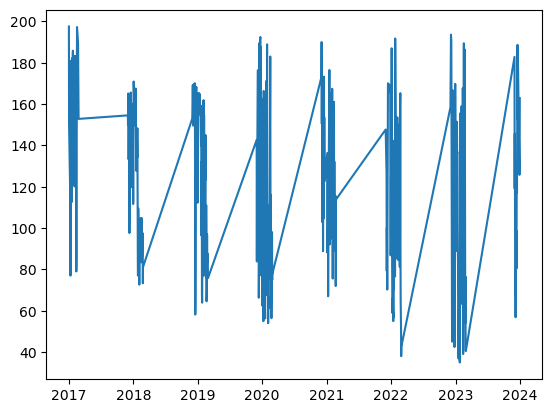

In [20]:
plt.plot((winter_aqi['Timestamp']),(winter_aqi['Overall AQI']))

In [21]:
winter_aqi['Year'] = winter_aqi['Timestamp'].dt.year
winter_aqi

C:\Users\Parth Chauhan\AppData\Local\Temp\ipykernel_32616\3945764547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_aqi['Year'] = winter_aqi['Timestamp'].dt.year


,Timestamp,Overall AQI,Season,Year
0,2017-01-01,197.533333,Winter,2017
1,2017-01-02,150.000000,Winter,2017
7,2017-01-08,116.466667,Winter,2017
8,2017-01-09,113.500000,Winter,2017
9,2017-01-10,77.016667,Winter,2017
...,...,...,...,...
2549,2023-12-19,152.366667,Winter,2023
2550,2023-12-20,185.466667,Winter,2023
2559,2023-12-29,125.766667,Winter,2023
2560,2023-12-30,131.733333,Winter,2023


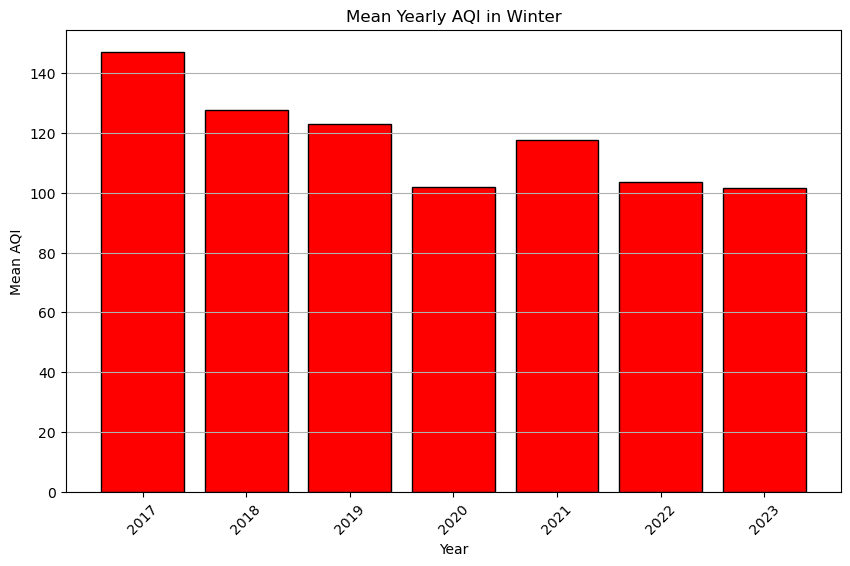

In [22]:
mean_yearly_aqi = winter_aqi.groupby('Year')['Overall AQI'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['Overall AQI'], color='red', edgecolor='black')
plt.title('Mean Yearly AQI in Winter')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Parth Chauhan\AppData\Local\Temp\ipykernel_32616\3735900578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_aqi['Year'] = summer_aqi['Timestamp'].dt.year


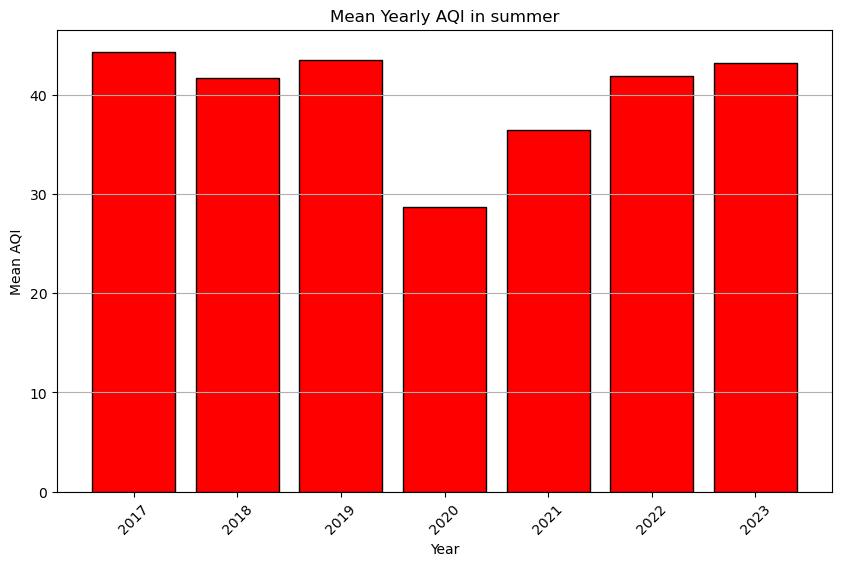

In [23]:
summer_aqi['Year'] = summer_aqi['Timestamp'].dt.year
mean_yearly_aqi = summer_aqi.groupby('Year')['Overall AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['Overall AQI'], color='red', edgecolor='black')
plt.title('Mean Yearly AQI in summer')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Parth Chauhan\AppData\Local\Temp\ipykernel_32616\3825295135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_aqi['Year'] = spring_aqi['Timestamp'].dt.year


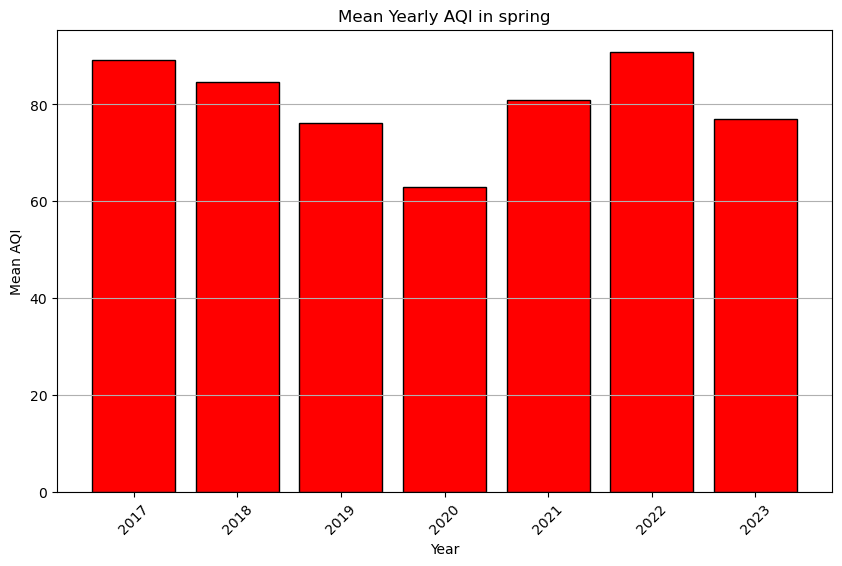

In [24]:
spring_aqi['Year'] = spring_aqi['Timestamp'].dt.year
mean_yearly_aqi = spring_aqi.groupby('Year')['Overall AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['Overall AQI'], color='red', edgecolor='black')
plt.title('Mean Yearly AQI in spring')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Parth Chauhan\AppData\Local\Temp\ipykernel_32616\2247026399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn_aqi['Year'] = autumn_aqi['Timestamp'].dt.year


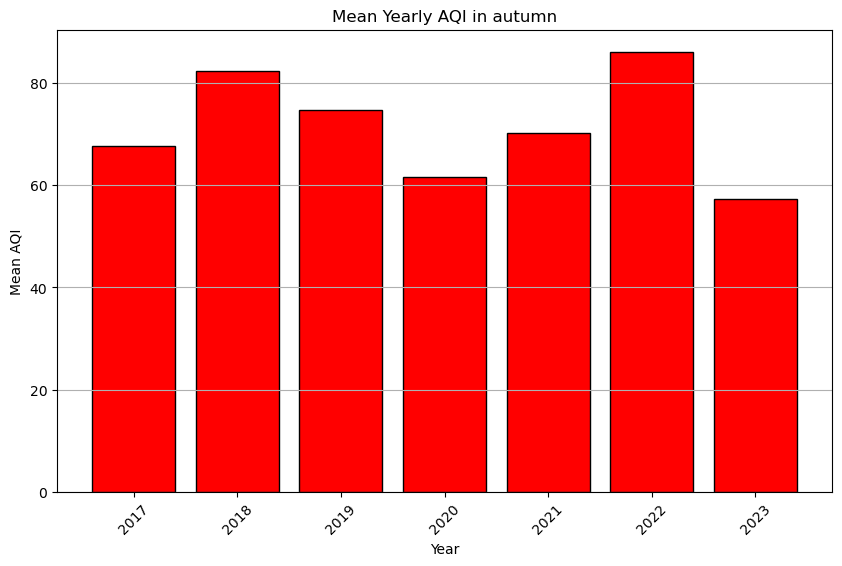

In [25]:
autumn_aqi['Year'] = autumn_aqi['Timestamp'].dt.year
mean_yearly_aqi = autumn_aqi.groupby('Year')['Overall AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['Overall AQI'], color='red', edgecolor='black')
plt.title('Mean Yearly AQI in autumn')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [26]:
autumn_aqi.describe()


,Timestamp,Overall AQI,Year
count,577,577.000000,577.00000
mean,2020-09-16 14:28:29.532062464,71.518244,2019.92721
min,2017-09-01 00:00:00,0.910000,2017.00000
25%,2018-10-26 00:00:00,38.500000,2018.00000
50%,2020-10-06 00:00:00,59.933333,2020.00000
75%,2022-09-12 00:00:00,92.983333,2022.00000
max,2023-11-30 00:00:00,196.433333,2023.00000
std,NaN,43.040915,2.01166


C:\Users\Parth Chauhan\AppData\Local\Temp\ipykernel_32616\2264123258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_aqi['Year'] = date_aqi['Timestamp'].dt.year


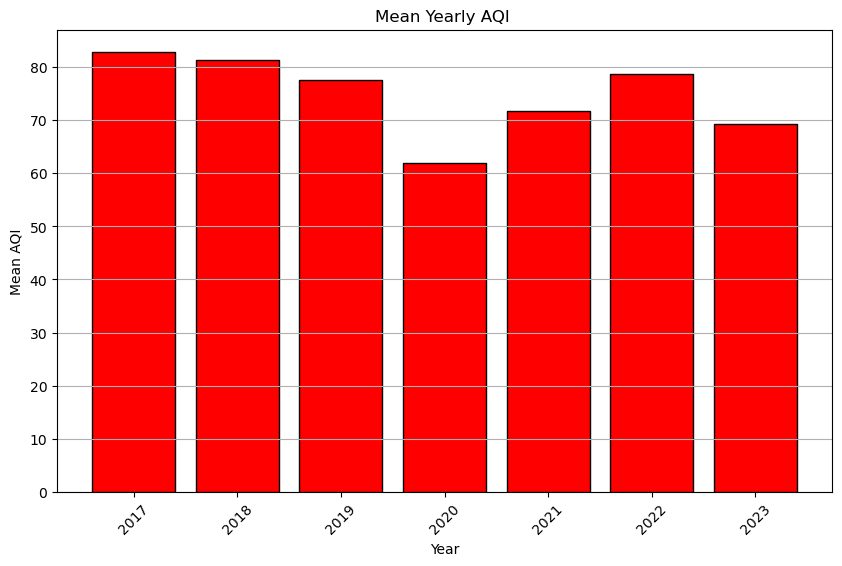

In [27]:
date_aqi['Year'] = date_aqi['Timestamp'].dt.year
mean_yearly_aqi = date_aqi.groupby('Year')['Overall AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['Overall AQI'], color='red', edgecolor='black')
plt.title('Mean Yearly AQI ')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [28]:
aqi_2017=date_aqi[date_aqi.Timestamp.dt.year==2017]
aqi_2018=date_aqi[date_aqi.Timestamp.dt.year==2018]
aqi_2019=date_aqi[date_aqi.Timestamp.dt.year==2019]
aqi_2020=date_aqi[date_aqi.Timestamp.dt.year==2020]
aqi_2021=date_aqi[date_aqi.Timestamp.dt.year==2021]
aqi_2022=date_aqi[date_aqi.Timestamp.dt.year==2022]
aqi_2023=date_aqi[date_aqi.Timestamp.dt.year==2023]
aqi_2024=date_aqi[date_aqi.Timestamp.dt.year==2024]

In [29]:
aqi_2019.describe()

,Timestamp,Overall AQI,Year
count,334,334.000000,334.0
mean,2019-06-25 19:54:15.089820416,77.646594,2019.0
min,2019-01-05 00:00:00,17.387500,2019.0
25%,2019-04-01 06:00:00,44.870833,2019.0
50%,2019-06-24 12:00:00,72.191667,2019.0
75%,2019-09-15 18:00:00,91.400000,2019.0
max,2019-12-31 00:00:00,192.433333,2019.0
std,NaN,40.254398,0.0


In [30]:
aqi_2017.describe()


,Timestamp,Overall AQI,Year
count,335,335.000000,335.0
mean,2017-07-12 08:44:25.074626816,82.931306,2017.0
min,2017-01-01 00:00:00,0.910000,2017.0
25%,2017-04-21 12:00:00,44.058333,2017.0
50%,2017-07-15 00:00:00,77.016667,2017.0
75%,2017-10-06 12:00:00,113.083333,2017.0
max,2017-12-31 00:00:00,197.533333,2017.0
std,NaN,45.691163,0.0


In [31]:
aqi_2018.describe()


,Timestamp,Overall AQI,Year
count,341,341.000000,341.0
mean,2018-07-10 21:57:32.199413504,81.380386,2018.0
min,2018-01-01 00:00:00,19.362500,2018.0
25%,2018-04-18 00:00:00,48.333333,2018.0
50%,2018-07-12 00:00:00,77.016667,2018.0
75%,2018-10-05 00:00:00,101.533333,2018.0
max,2018-12-31 00:00:00,170.900000,2018.0
std,NaN,40.736884,0.0


In [32]:
aqi_2019.describe()

,Timestamp,Overall AQI,Year
count,334,334.000000,334.0
mean,2019-06-25 19:54:15.089820416,77.646594,2019.0
min,2019-01-05 00:00:00,17.387500,2019.0
25%,2019-04-01 06:00:00,44.870833,2019.0
50%,2019-06-24 12:00:00,72.191667,2019.0
75%,2019-09-15 18:00:00,91.400000,2019.0
max,2019-12-31 00:00:00,192.433333,2019.0
std,NaN,40.254398,0.0


In [33]:
aqi_2020.describe()

,Timestamp,Overall AQI,Year
count,338,338.000000,338.0
mean,2020-06-22 11:55:44.378698240,61.910821,2020.0
min,2020-01-01 00:00:00,15.500000,2020.0
25%,2020-03-29 06:00:00,30.895833,2020.0
50%,2020-06-21 12:00:00,53.733333,2020.0
75%,2020-09-13 18:00:00,77.016667,2020.0
max,2020-12-21 00:00:00,190.000000,2020.0
std,NaN,39.501012,0.0


In [34]:
aqi_2021.describe()

,Timestamp,Overall AQI,Year
count,324,324.000000,324.0
mean,2021-07-03 02:00:00,71.848830,2021.0
min,2021-01-04 00:00:00,18.000000,2021.0
25%,2021-04-14 18:00:00,34.270833,2021.0
50%,2021-07-04 12:00:00,55.708333,2021.0
75%,2021-09-23 06:00:00,100.358333,2021.0
max,2021-12-31 00:00:00,185.733333,2021.0
std,NaN,44.333084,0.0


In [35]:
aqi_2022.describe()

,Timestamp,Overall AQI,Year
count,331,331.000000,331.0
mean,2022-06-24 23:55:38.972809728,78.821669,2022.0
min,2022-01-01 00:00:00,23.866667,2022.0
25%,2022-04-02 12:00:00,41.666667,2022.0
50%,2022-06-24 00:00:00,66.400000,2022.0
75%,2022-09-14 12:00:00,99.150000,2022.0
max,2022-12-31 00:00:00,196.433333,2022.0
std,NaN,45.914477,0.0


In [36]:
aqi_2023.describe()

,Timestamp,Overall AQI,Year
count,324,324.000000,324.0
mean,2023-06-24 10:40:00,69.217361,2023.0
min,2023-01-01 00:00:00,25.000000,2023.0
25%,2023-03-28 18:00:00,39.762500,2023.0
50%,2023-06-21 12:00:00,59.491667,2023.0
75%,2023-09-18 06:00:00,85.879167,2023.0
max,2023-12-31 00:00:00,190.533333,2023.0
std,NaN,37.839085,0.0
